In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

from env import host, user, password, get_db_url
import acquire as ac

import warnings
warnings.filterwarnings("ignore")

---
# Acquire

In [2]:
df = ac.get_telco_data()
print(df.shape)
df.head()

(7043, 23)


,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,internet_service_type,...,tech_support,streaming_tv,streaming_movies,contract_type_id,contract_type,paperless_billing,payment_type_id,payment_type,monthly_charges,churn
0,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,DSL,...,No,No,Yes,1,Month-to-month,No,2,Mailed check,59.9,No
1,0013-MHZWF,Female,0,No,Yes,9,Yes,No,1,DSL,...,Yes,Yes,Yes,1,Month-to-month,Yes,4,Credit card (automatic),69.4,No
2,0015-UOCOJ,Female,1,No,No,7,Yes,No,1,DSL,...,No,No,No,1,Month-to-month,Yes,1,Electronic check,48.2,No
3,0023-HGHWL,Male,1,No,No,1,No,No phone service,1,DSL,...,No,No,No,1,Month-to-month,Yes,1,Electronic check,25.1,Yes
4,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,1,DSL,...,No,No,No,1,Month-to-month,No,3,Bank transfer (automatic),30.5,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
customer_id                 7043 non-null object
gender                      7043 non-null object
senior_citizen              7043 non-null int64
partner                     7043 non-null object
dependents                  7043 non-null object
tenure                      7043 non-null int64
phone_service               7043 non-null object
multiple_lines              7043 non-null object
internet_service_type_id    7043 non-null int64
internet_service_type       7043 non-null object
online_security             7043 non-null object
online_backup               7043 non-null object
device_protection           7043 non-null object
tech_support                7043 non-null object
streaming_tv                7043 non-null object
streaming_movies            7043 non-null object
contract_type_id            7043 non-null int64
contract_type               7043 non-null object
paperless_billi

- may need to encode gender
- senior_citizen is an integer -> consider changing to bool but not necessary
- partner, dependents, phone_service, paperless_billing, and churn are objects -> need to be bool


In [4]:
df.describe()

,senior_citizen,tenure,internet_service_type_id,contract_type_id,payment_type_id,monthly_charges
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,1.872923,1.690473,2.315633,64.761692
std,0.368612,24.559481,0.737796,0.833755,1.148907,30.090047
min,0.000000,0.000000,1.000000,1.000000,1.000000,18.250000
25%,0.000000,9.000000,1.000000,1.000000,1.000000,35.500000
50%,0.000000,29.000000,2.000000,1.000000,2.000000,70.350000
75%,0.000000,55.000000,2.000000,2.000000,3.000000,89.850000
max,1.000000,72.000000,3.000000,3.000000,4.000000,118.750000


In [5]:
df.isna().sum()

customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
internet_service_type_id    0
internet_service_type       0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
contract_type_id            0
contract_type               0
paperless_billing           0
payment_type_id             0
payment_type                0
monthly_charges             0
churn                       0
dtype: int64

In [6]:
for c in df.columns:
    print(df[c].value_counts())
    print()

4877-TSOFF    1
7225-CBZPL    1
2606-RMDHZ    1
9588-OZDMQ    1
5846-QFDFI    1
             ..
9921-QFQUL    1
4238-HFHSN    1
0848-ZGQIJ    1
0392-BZIUW    1
6221-AVQYL    1
Name: customer_id, Length: 7043, dtype: int64

Male      3555
Female    3488
Name: gender, dtype: int64

0    5901
1    1142
Name: senior_citizen, dtype: int64

No     3641
Yes    3402
Name: partner, dtype: int64

No     4933
Yes    2110
Name: dependents, dtype: int64

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

Yes    6361
No      682
Name: phone_service, dtype: int64

No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64

2    3096
1    2421
3    1526
Name: internet_service_type_id, dtype: int64

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

No                     3498
Yes                    2019

In [7]:
# looks like all of these people are customers
df[(df.phone_service == "No") & (df.internet_service_type == "None")]

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,internet_service_type,...,tech_support,streaming_tv,streaming_movies,contract_type_id,contract_type,paperless_billing,payment_type_id,payment_type,monthly_charges,churn


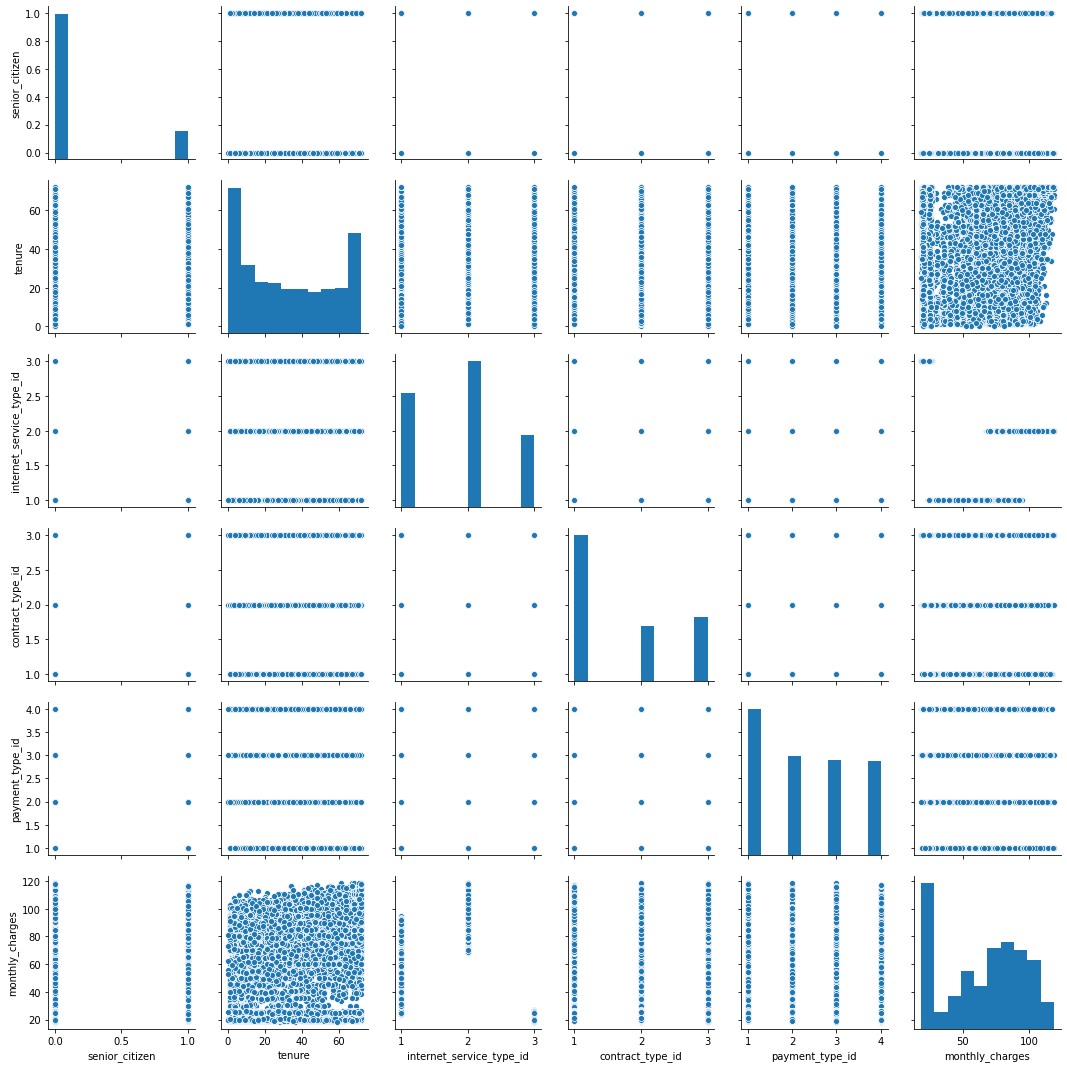

In [8]:
sns.pairplot(df)